In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
import scipy.fftpack


Variable initialization

In [2]:
N = 32 # signal dimension
M = 32 # number of atoms in the span (for basis M = N)

C = np.zeros((N, M)) # matrix containing the standard basis (a kronecker delta in each column)
D = np.zeros((N, M)) # matrix containing the DCT basis (a DCT function in each column)


Generate the 1D-DCT basis

Text(0.5, 1.0, 'DCT basis')

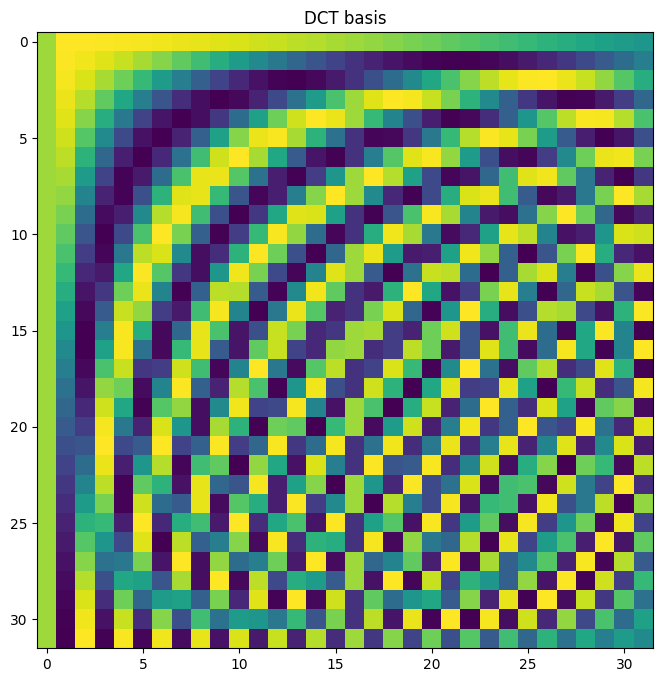

In [3]:
for i in range(M):
    a = np.zeros(M)
    a[i] = 1
    D[:, i] = sp.fftpack.idct(a, norm='ortho')

plt.figure(figsize=(8,8))
plt.imshow(D)
plt.title('DCT basis')

Generate a signal that is sparse w.r.t. D
-----------------------------------------
Set the signal sparsity (try different values)

In [4]:
L = 15

Randomly define the coefficients of a sparse representation (make sure the nonzero coefficients are sufficiently large)

In [5]:
x0 = np.zeros(M)
indexs = np.random.randint(0,M,L)
x0[indexs] = np.random.rand(L) * 10

Synthetize the corresponding signal in the signal domain and add noise


In [6]:
s0 = np.dot(D, x0)

sigma_noise = 0.2 # noise to be added to the signal

s = s0 + np.random.normal(size=(M)) * sigma_noise

Plot the sparse signal

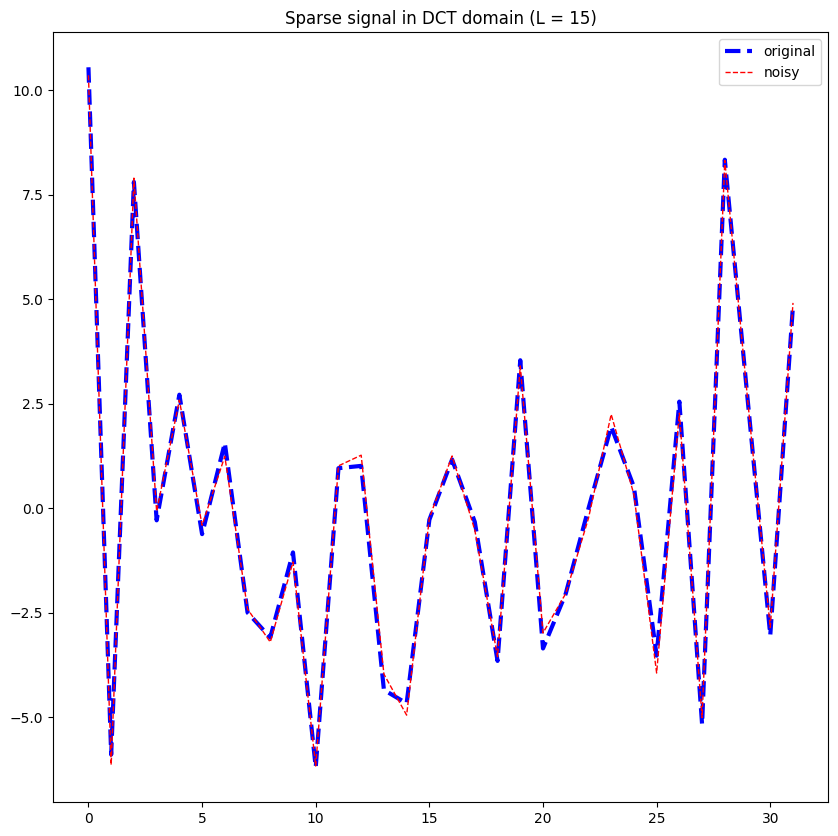

In [7]:
LN_WDT = 2
MRK_SZ = 10

plt.figure(figsize=(10,10))
plt.plot(s0, 'b--', linewidth=LN_WDT+1)
plt.plot(s, 'r--', linewidth=LN_WDT-1)
plt.title(f'Sparse signal in DCT domain (L = {L:.0f})')
plt.legend(['original', 'noisy'])


Implement the sparsity-promoting denoising 
-------------------------------------------
This is expected to be very effective on S!

Analysis: compute the coefficients w.r.t. D

In [8]:
x = np.dot(np.transpose(D), s)

Keep only the L largest coefficients (absolute value)

In [9]:
# perform thresholding
x_hat = x.copy()
position_largest_values = np.argsort(-np.abs(x_hat))[:L]

for c in range(x_hat.shape[0]):
  if (c in position_largest_values) == False:
    x_hat[c] = 0

Synthesis: invert the transform

In [10]:
s_hat = np.dot(D, x)

Plot the results

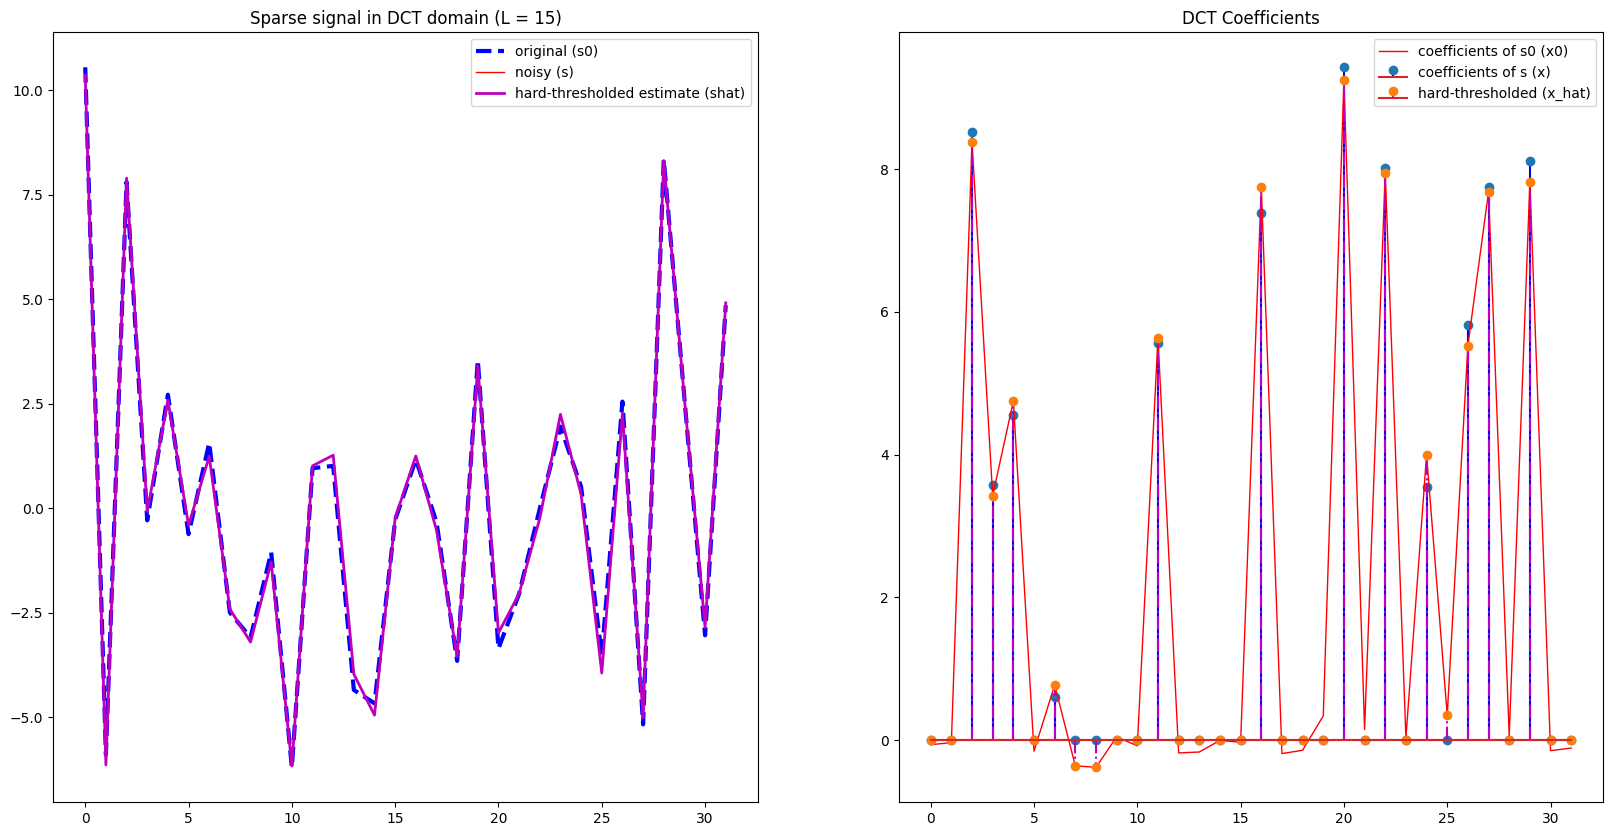

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].plot(s0, 'b--', linewidth=LN_WDT+1)
ax[0].plot(s, 'r-', linewidth=LN_WDT-1)
ax[0].plot(s_hat, 'm-', linewidth=LN_WDT)
ax[0].set_title(f'Sparse signal in DCT domain (L = {L:.0f})')
ax[0].legend(['original (s0)', 'noisy (s)', 'hard-thresholded estimate (shat)'])


ax[1].stem(x0, linefmt='b-', markerfmt='C0o')
ax[1].plot(x, 'r-', linewidth=LN_WDT-1)
ax[1].stem(x_hat, linefmt='m-.', markerfmt='C1o')
ax[1].set_title('DCT Coefficients')
ax[1].legend(['coefficients of s0 (x0)', 'coefficients of s (x)', 'hard-thresholded (x_hat)'])


Sparsity w.r.t redoundant dictionary
------------------------------------
Generate the standard orthonormal basis

Text(0.5, 1.0, 'Canonical basis dimension n = 32')

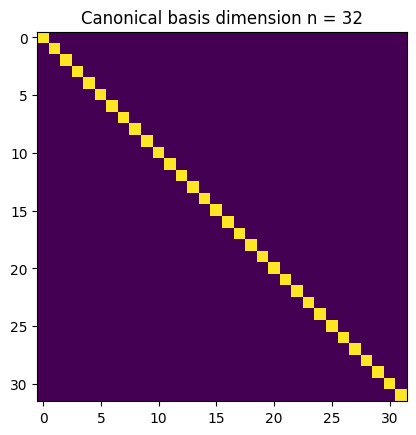

In [12]:
for i in range(M):
    a = np.zeros(M)
    a[i] = 1
    C[:, i] = a

plt.figure(5)
plt.imshow(C)
plt.title(f'Canonical basis dimension n = {M}')


Generate signals that are sparse w.r.t. $[C, D]$ by adding a spike to $s$ that is sparse w.r.t. $D$. Bear in mind that the spike is to be considered a signal to be reconstructed, rather than noise.

Generate a signal that is sparse w.r.t. D

In [13]:
L = 15

x0 = np.zeros(M)
indexs = np.random.randint(0,M,L)
x0[indexs] = np.random.rand(L) * 10

s0 = np.dot(D, x0)

Randomly place a spike in the first 20 samples of s


In [14]:
# choose spike location
spikeLocation = np.random.randint(0,20,1)

# modify the signal intensity at spikeLocation
s0[spikeLocation] += 10

Add noise to the signal

In [15]:
s = s0 + np.random.normal(size=(M)) * sigma_noise

Perform hard thresholding on the coefficients w.r.t. $D$

In [16]:
# analysis: compute the coefficients w.r.t. D
x = np.dot(np.transpose(D), s)

# keep only the L largest coefficients (absolute value)
x_hat = x.copy()
position_largest_values = np.argsort(-np.abs(x_hat))[:L]

for c in range(x_hat.shape[0]):
  if (c in position_largest_values) == False:
    x_hat[c] = 0

# invert the transformation
s_hat = np.dot(D, x_hat)

Plot the results

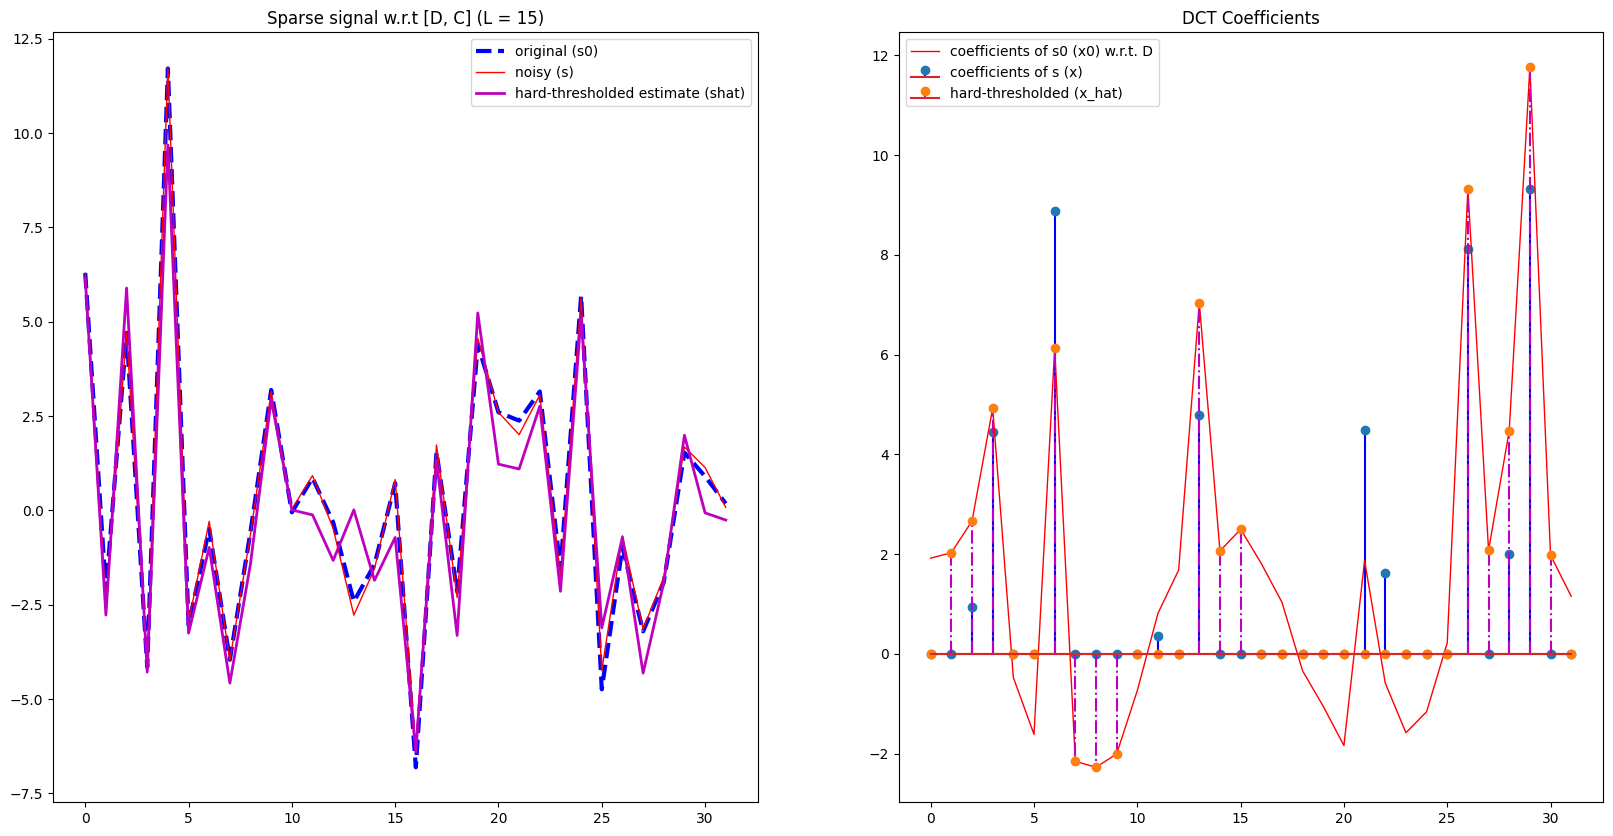

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].plot(s0, 'b--', linewidth=LN_WDT+1)
ax[0].plot(s, 'r-', linewidth=LN_WDT-1)
ax[0].plot(s_hat, 'm-', linewidth=LN_WDT)
ax[0].set_title(f'Sparse signal w.r.t [D, C] (L = {L:.0f})')
ax[0].legend(['original (s0)', 'noisy (s)', 'hard-thresholded estimate (shat)'])

ax[1].stem(x0, linefmt='b-', markerfmt='C0o')
ax[1].plot(x, 'r-', linewidth=LN_WDT-1)
ax[1].stem(x_hat, linefmt='m-.', markerfmt='C1o')
ax[1].set_title('DCT Coefficients')
ax[1].legend(['coefficients of s0 (x0) w.r.t. D', 'coefficients of s (x)', 'hard-thresholded (x_hat)'])